## Data Preparation
#### First we analyze the data:
1. Search for missing values
2. Check dataset balance
#### Then we use NLP techniques such as:
1. Stemming
2. Tokenization
3. Stop-word removal

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import re

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from matplotlib import pyplot
from utils.phrase_breaker import phrase_breaker
from collections import Counter

## Data Analysis

In [2]:
# Import the data onto dataframe
data = pd.read_csv("data/reviews_large.csv", names=["Review Text", "Stars", "Polarity"])
# data = pd.read_csv("data/reviews.csv", names=["Review Text", "Stars", "Polarity"])
data

,Review Text,Stars,Polarity
0,"It was really good course, I recommend for hav...",5,positive
1,"It was really good course, I recommend for hav...",5,positive
2,The instructions for the final project -- the ...,1,negative
3,Would have liked to do the assignments if the...,1,negative
4,"Coursera issue, not the course itself. Courser...",1,negative
...,...,...,...
277282,Great Course,5,positive
277283,Good course,5,positive
277284,Good course,5,positive
277285,Great!!!,5,positive


In [3]:
# Look for null values
data.isnull().values.any()

False

<AxesSubplot:xlabel='Stars', ylabel='count'>

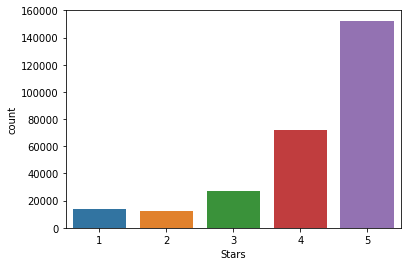

In [4]:
# Check dataset balance
sns.countplot(x="Stars", data=data)

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

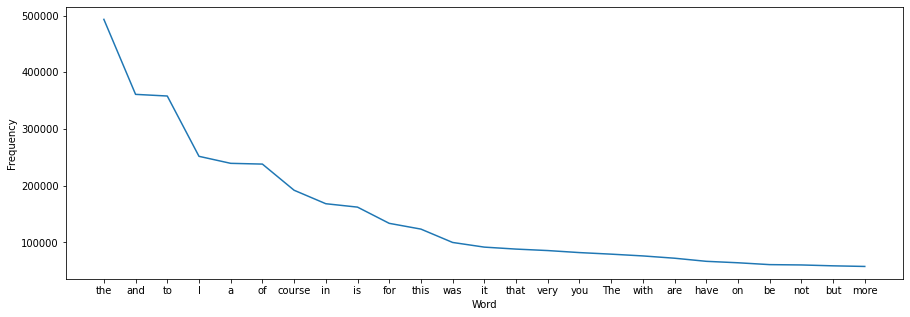

In [5]:
# K most frequent words
counter = Counter(" ".join(data["Review Text"]).split())
most_occur = counter.most_common(25)
words, freq = zip(*most_occur)

freq_words = pd.DataFrame({'Frequency': freq, 'Word': words})

fig, ax = pyplot.subplots(figsize=(15.0, 5.0))
sns.lineplot(data=freq_words, x="Word", y="Frequency", ax=ax)

In [6]:
# Creating dataframe with original vocabulary (existent words)
# Mainly for performance evaluation purposes

original_set = set()
data["Review Text"].str.split().apply(original_set.update)

original_data = {
    'Number of Words': [len(list(original_set))],
    'Type': ["original"],
}

pf_df = pd.DataFrame(original_data)
pf_df

,Number of Words,Type
0,190493,original


## Data Preparation

In [7]:
# Applying phrase breaker to reviews
data["Review Text"] = data["Review Text"].apply(phrase_breaker)
data["Review Text"].head()

0    It was really good course, I recommend for hav...
1    It was really good course, I recommend for hav...
2    The instructions for the final project -- the ...
3    Would have liked to do the assignments if they...
4    Coursera issue, not the course itself. Courser...
Name: Review Text, dtype: object

<AxesSubplot:xlabel='Type', ylabel='Number of Words'>

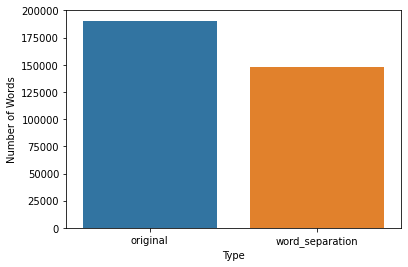

In [8]:
# Evaluate the decrease in complexity levels after separating every word in every review
word_sep_set = set()
data["Review Text"].str.split().apply(word_sep_set.update)

word_sep_data = {
    'Number of Words': len(list(word_sep_set)),
    'Type': "word_separation",
}

pf_df = pf_df.append(word_sep_data, ignore_index=True)

sns.barplot(x="Type", y="Number of Words", data=pf_df)

In [10]:
# Remove punctuation
data["Review Text"] = data["Review Text"].str.replace(r'[^\w\s]', '')
data["Review Text"].head()

<ipython-input-10-5c0f7ab28385>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data["Review Text"] = data["Review Text"].str.replace(r'[^\w\s]', '')


0    It was really good course I recommend for havi...
1    It was really good course I recommend for havi...
2    The instructions for the final project  the pr...
3    Would have liked to do the assignments if they...
4    Coursera issue not the course itself Coursera ...
Name: Review Text, dtype: object

In [11]:
# Tokenize all reviews for pre-processing purposes
data["Review Text"] = data["Review Text"].apply(word_tokenize)
data["Review Text"].head()

0    [It, was, really, good, course, I, recommend, ...
1    [It, was, really, good, course, I, recommend, ...
2    [The, instructions, for, the, final, project, ...
3    [Would, have, liked, to, do, the, assignments,...
4    [Coursera, issue, not, the, course, itself, Co...
Name: Review Text, dtype: object

In [12]:
# All review text is transformed into lower case
def lower_casing(words):
    lower_case_words = []
    for word in words:
        lower_case_words.append(word.lower())
    return lower_case_words

data["Review Text"] = data["Review Text"].apply(lower_casing)
data["Review Text"].head()

0    [it, was, really, good, course, i, recommend, ...
1    [it, was, really, good, course, i, recommend, ...
2    [the, instructions, for, the, final, project, ...
3    [would, have, liked, to, do, the, assignments,...
4    [coursera, issue, not, the, course, itself, co...
Name: Review Text, dtype: object

<AxesSubplot:xlabel='Type', ylabel='Number of Words'>

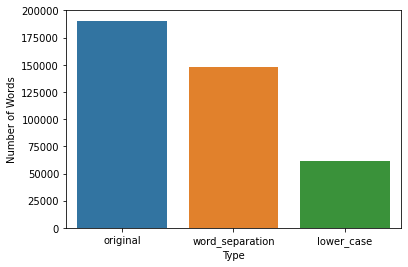

In [13]:
# Evaluate the decrease in complexity levels after lower casing every review
lower_case = set()
data["Review Text"].apply(lower_case.update)

lower_case_data = {
    'Number of Words': len(list(lower_case)),
    'Type': "lower_case",
}

pf_df = pf_df.append(lower_case_data, ignore_index=True)

sns.barplot(x="Type", y="Number of Words", data=pf_df)

### POS Tagging

In [14]:
# POS Tagging
pos_tagged_vocab = data["Review Text"].apply(pos_tag)
pos_tagged_vocab.head()

0    [(it, PRP), (was, VBD), (really, RB), (good, J...
1    [(it, PRP), (was, VBD), (really, RB), (good, J...
2    [(the, DT), (instructions, NNS), (for, IN), (t...
3    [(would, MD), (have, VB), (liked, VBN), (to, T...
4    [(coursera, NN), (issue, NN), (not, RB), (the,...
Name: Review Text, dtype: object

In [15]:
def select_categories(pos_tagged_words):
    pos_tags_filter = ["JJ", "JJR", "JJS", "NN", "NNS", "RB", "RBR", "RBS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
    selected_words = []
    for word, pos_tag in pos_tagged_words:
        if pos_tag in pos_tags_filter:
            selected_words.append(word)
    return selected_words

data["Processed Review Text"] = pos_tagged_vocab.apply(select_categories)
data["Processed Review Text"].head()

0    [was, really, good, course, i, recommend, havi...
1    [was, really, good, course, i, recommend, havi...
2    [instructions, final, project, project, is, bi...
3    [have, liked, do, assignments, weren, locked, ...
4    [coursera, issue, not, course, coursera, app, ...
Name: Processed Review Text, dtype: object

<AxesSubplot:xlabel='Type', ylabel='Number of Words'>

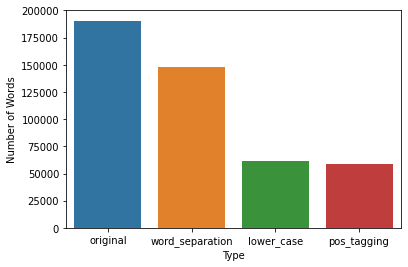

In [16]:
# Evaluate the decrease in complexity levels after filtering data through POS Tagging
pos_tagging_set = set()
data["Processed Review Text"].apply(pos_tagging_set.update)

pos_tagging_data = {
    'Number of Words': len(list(pos_tagging_set)),
    'Type': "pos_tagging",
}

pf_df = pf_df.append(pos_tagging_data, ignore_index=True)

sns.barplot(x="Type", y="Number of Words", data=pf_df)

### Post-Processing with lemmatization to reduce complexity

In [17]:
# Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatization(sentence):
    lemmatized_sentence = []

    for word in sentence:
        lemmatized_sentence.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
    
    return lemmatized_sentence

data["Processed Review Text"] = data["Processed Review Text"].apply(lemmatization)
data["Processed Review Text"].head()

0    [be, really, good, course, i, recommend, have,...
1    [be, really, good, course, i, recommend, have,...
2    [instructions, final, project, project, be, bi...
3    [have, like, do, assignments, weren, lock, pay...
4    [coursera, issue, not, course, coursera, app, ...
Name: Processed Review Text, dtype: object

<AxesSubplot:xlabel='Type', ylabel='Number of Words'>

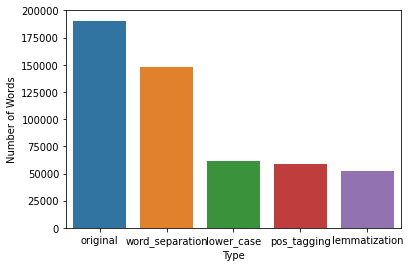

In [18]:
# Evaluate the decrease in complexity levels after lemmatization
lemmatization = set()
data["Processed Review Text"].apply(lemmatization.update)

lemmatization_data = {
    'Number of Words': len(list(lemmatization)),
    'Type': "lemmatization",
}

pf_df = pf_df.append(lemmatization_data, ignore_index=True)

sns.barplot(x="Type", y="Number of Words", data=pf_df)

In [19]:
data["Review Text"] = data["Review Text"].apply(" ".join)
data["Processed Review Text"] = data["Processed Review Text"].apply(" ".join)

### Post-Processing data visualization and analysis

In [20]:
# Look for null values after cleaning
data.isnull().values.any()

False

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

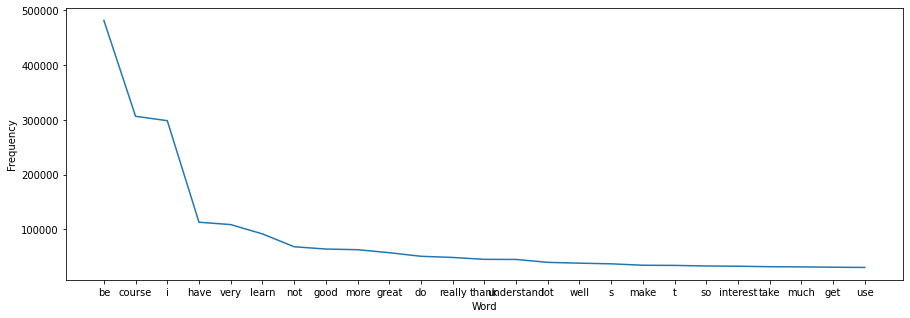

In [21]:
# K most frequent words
counter = Counter(" ".join(data["Processed Review Text"]).split())
most_occur = counter.most_common(25)
words, freq = zip(*most_occur)

freq_words = pd.DataFrame({'Frequency': freq, 'Word': words})

fig, ax = pyplot.subplots(figsize=(15.0, 5.0))
sns.lineplot(data=freq_words, x="Word", y="Frequency", ax=ax)

In [22]:
data["Processed Review Text"] = data["Processed Review Text"].apply(lambda x: re.sub(r"\b[a-zA-Z]\b", "", x))

<AxesSubplot:xlabel='Word', ylabel='Frequency'>

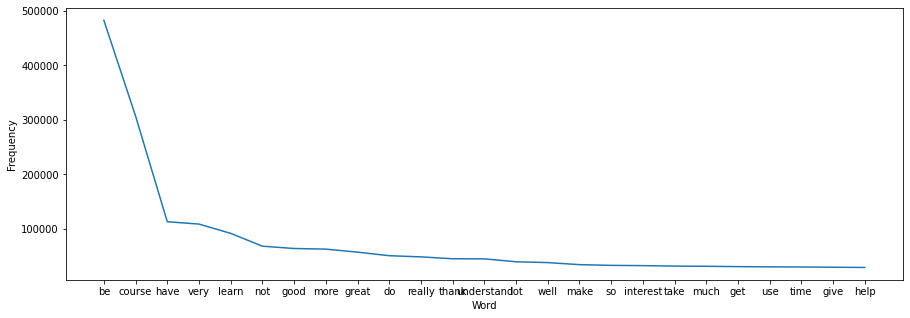

In [23]:
# K most frequent words
counter = Counter(" ".join(data["Processed Review Text"]).split())
most_occur = counter.most_common(25)
words, freq = zip(*most_occur)

freq_words = pd.DataFrame({'Frequency': freq, 'Word': words})

fig, ax = pyplot.subplots(figsize=(15.0, 5.0))
sns.lineplot(data=freq_words, x="Word", y="Frequency", ax=ax)

### Save filtered data to csv

In [24]:
# Share data between notebooks
# data.to_csv('data/filtered_reviews.csv', index=False, header=False)
data.to_csv('data/filtered_reviews_large.csv', index=False, header=False)